Взять из прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель  

monthly-sales-of-company-x-jan-6.csv  
monthly-boston-armed-robberies-j.csv  
daily-total-female-births-in-cal.csv  

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. monthly-boston-armed-robberies-j.csv (не стационарный)

In [116]:
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [117]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "robberies in boston": robberies_in_boston["Count"],
    "Daily total female births in California": female_births["Count"]
}

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The colNu

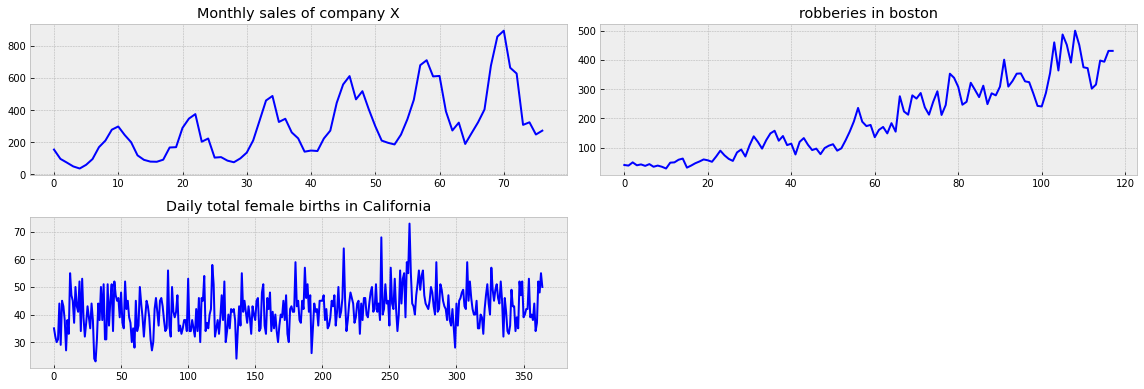

In [118]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

### Скользящее среднее

In [44]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [45]:
ser = moving_average(robberies_in_boston["Count"], 7)

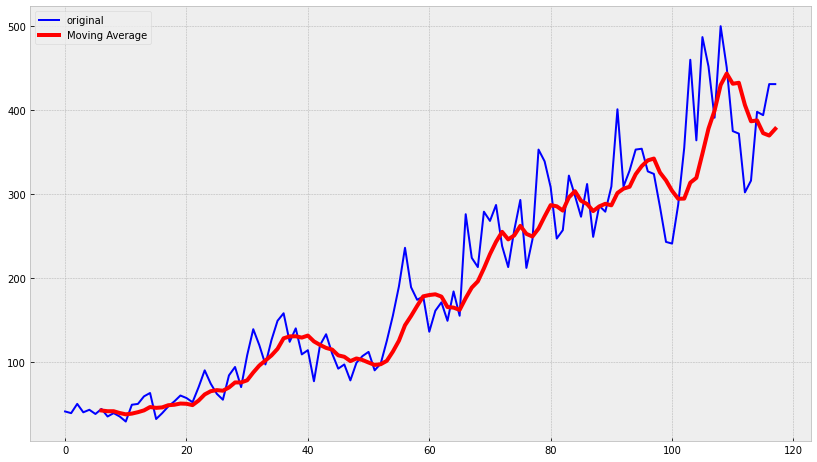

In [46]:
ser = moving_average(robberies_in_boston["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(robberies_in_boston["Count"], color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Функция, которая предсказывает 5 следующих измерений

In [47]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series

In [48]:
series_pred = predict(robberies_in_boston["Count"], 7, 50)

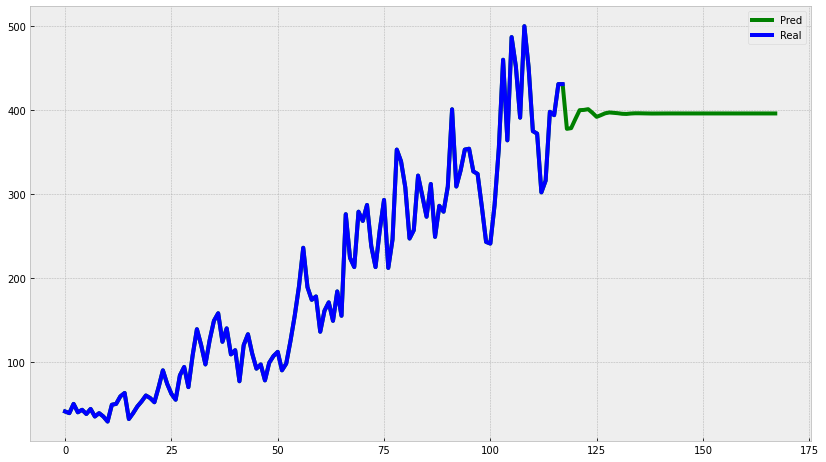

In [49]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred, color='green', linewidth='4', label='Pred')
    plt.plot(sales_of_company_x["Count"], color='blue', linewidth='4', label='Real')
    plt.legend()

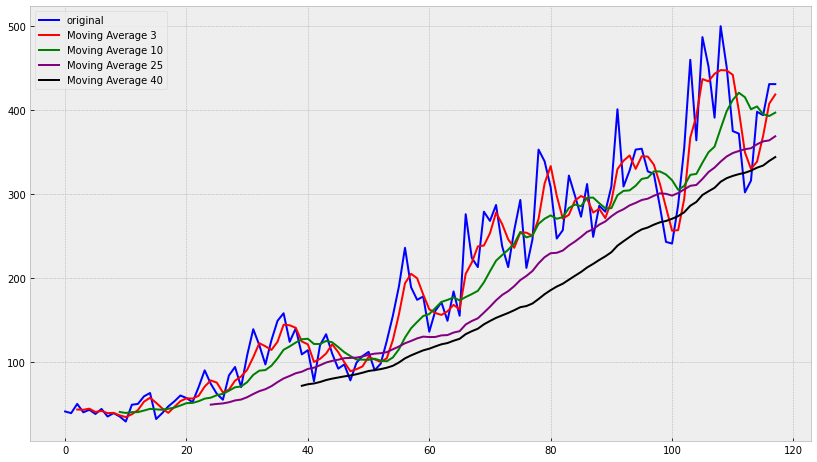

In [50]:
windows = [3,10,25,40]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    for i in range(len(windows)):
        ser = moving_average(robberies_in_boston["Count"], windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='Moving Average {}'.format(windows[i]))
    plt.legend()

### Сгенерируем случайный шум и усредним его скользящим средним

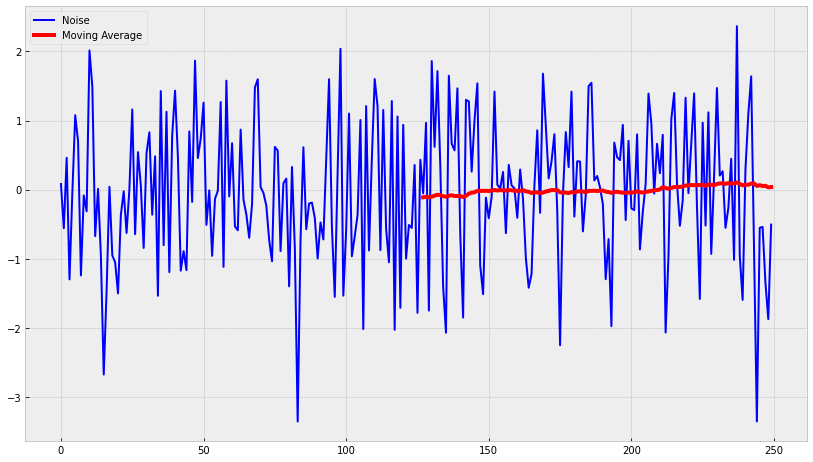

In [51]:
random_noise = pd.Series(np.random.randn(250))
ma_on_noise = moving_average(random_noise, 128)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(random_noise, color='blue',label='Noise')
    plt.plot(ma_on_noise, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Сгенерируем случайный шум с трендом и усредним его скользящим средним

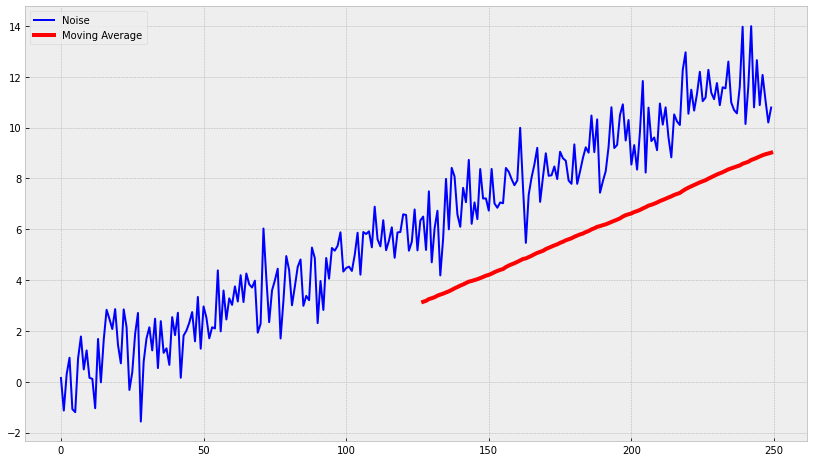

In [52]:
random_noise = np.random.randn(250)
k = 0.05
b = 0
random_noise_trend = pd.Series([k*i + b + random_noise[i] for i in range(len(random_noise))])
ma_on_noise_trend = moving_average(random_noise_trend, 128)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(random_noise_trend, color='blue',label='Noise')
    plt.plot(ma_on_noise_trend, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [59]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum())
    return wma

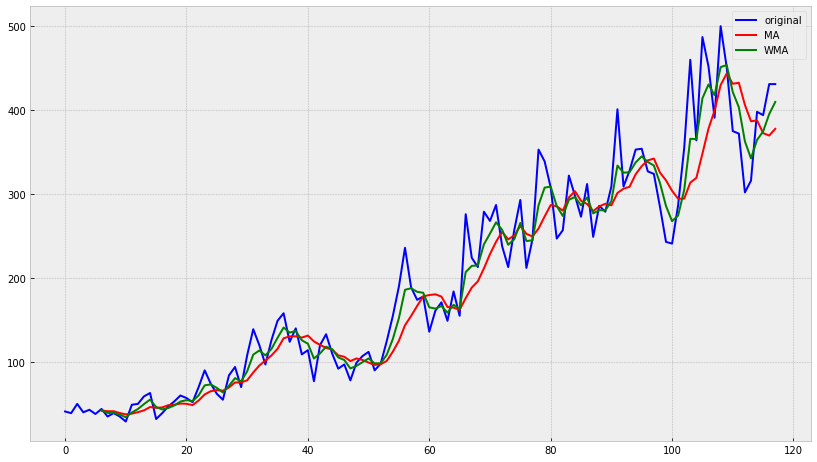

In [60]:
wma = weighted_moving_average(robberies_in_boston["Count"], 7, [1,1,2,3,5,8,13])
ma = moving_average(robberies_in_boston["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(robberies_in_boston["Count"], color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

### Возьм ряд monthly sales of company x jan 6 и примените к нему wma. В качестве коэффициентов рассмотрите числа Фиббоначи, последовательные числа и степени двойки¶

In [65]:
series = sales_of_company_x["Count"]
wma_fib = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(series, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(series, 7, [1,2,4,8,16,32,64])

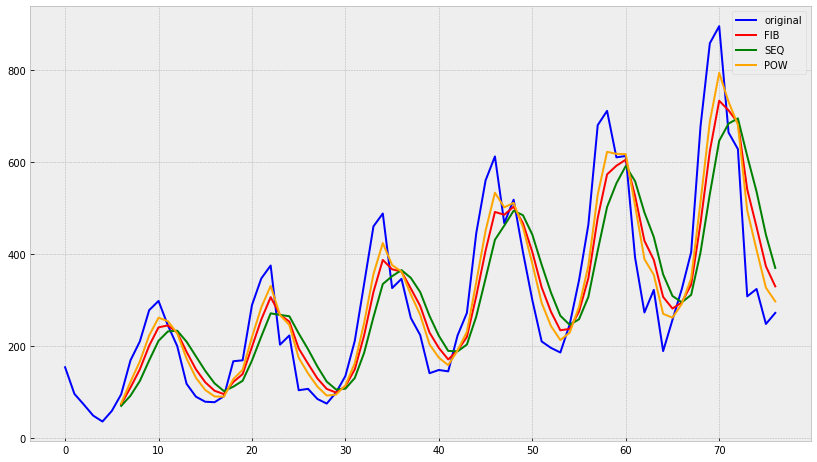

In [66]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

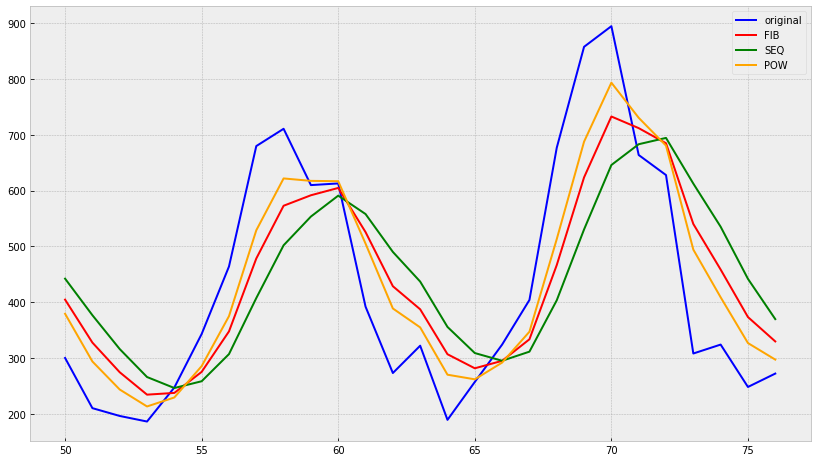

In [67]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series[50:80], color='blue',label='original')
    
    plt.plot(wma_fib[50:80], color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq[50:80], color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow[50:80], color='orange', linewidth='2', label='POW')
    plt.legend()

### Экспоненциальное сглаживание

In [70]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

In [71]:
ema = exponential_moving_average(robberies_in_boston["Count"], 0.2)

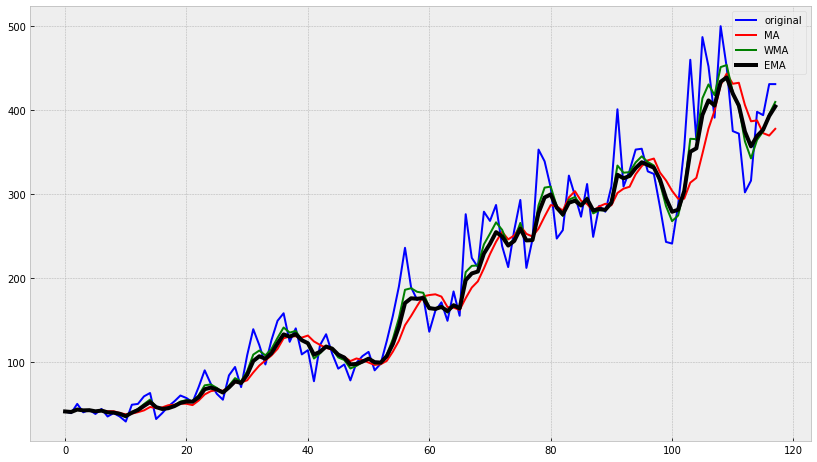

In [72]:
ema = exponential_moving_average(robberies_in_boston["Count"], 0.3)
wma = weighted_moving_average(robberies_in_boston["Count"], 7, [1,1,2,3,5,8,13])
ma = moving_average(robberies_in_boston["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(robberies_in_boston["Count"], color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

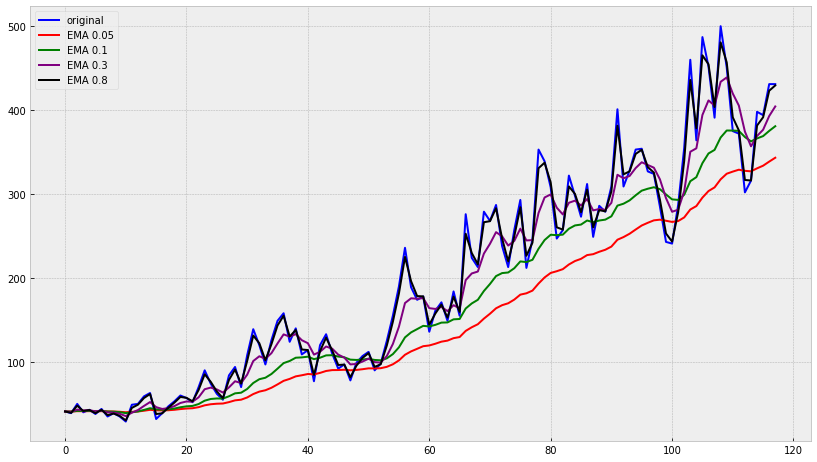

In [73]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(robberies_in_boston["Count"], color='blue',label='original')
    for i in range(len(alphas)):
        ser = exponential_moving_average(robberies_in_boston["Count"], alphas[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.legend()

### функция, которая предсказывает 5 наблюдений ряда на основе ema. Возьмите ряд monthly sales of company x jan и спрогнозируем

In [74]:
def exponential_moving_average(series, alpha, n_pred=None):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n-1] + (1 - alpha) * result[n-1])
    if not n_pred:
        return pd.Series(result)
    
    predictions = [alpha * series[len(series) - 1] + (1 - alpha) * result[-1]]

    for _ in range(n_pred):
        res = alpha * predictions[-1] + (1 - alpha) * result[-1]
        result.append(res)
        predictions.append(res)
    
    return series.append(pd.Series(predictions), ignore_index=True), pd.Series(result)

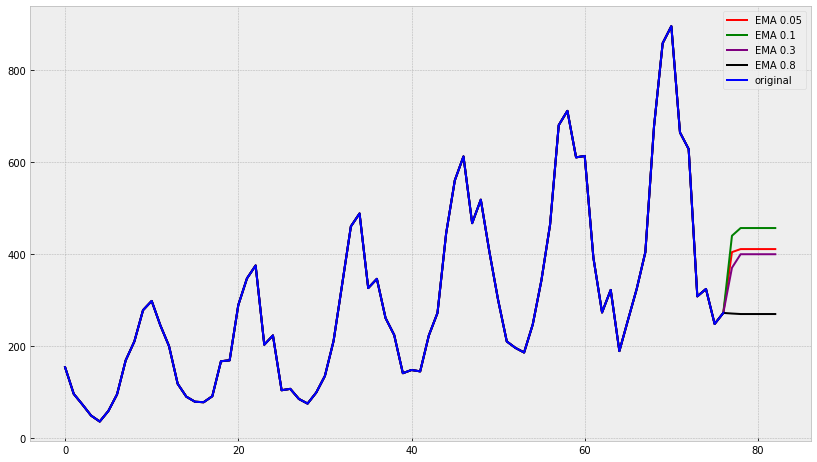

In [75]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = exponential_moving_average(sales_of_company_x["Count"], alphas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.legend()

### Двойное экспоненциальное сглаживание

In [79]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [80]:
def plot_dema(alpha, beta):
    dema = double_ema(robberies_in_boston["Count"], alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(robberies_in_boston["Count"], color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

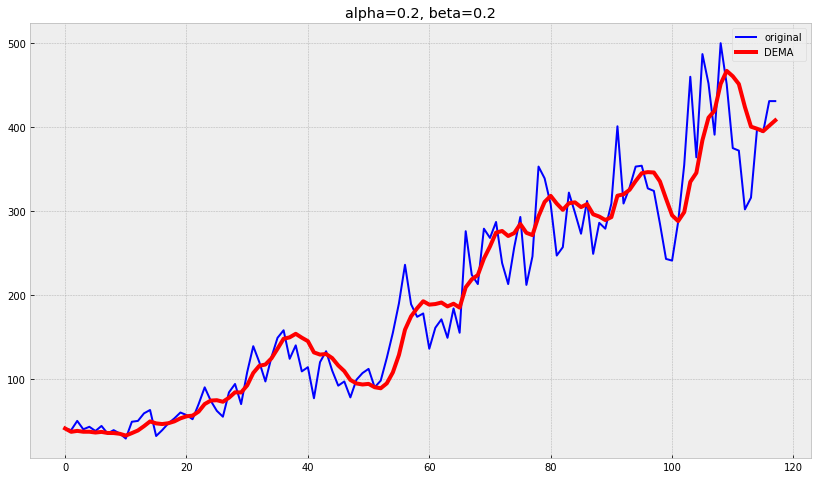

In [81]:
plot_dema(0.2, 0.2)

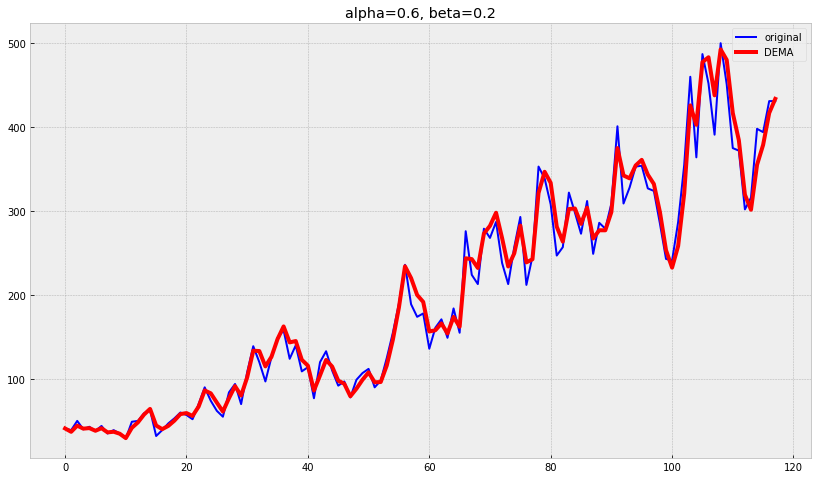

In [82]:
plot_dema(0.6, 0.2)

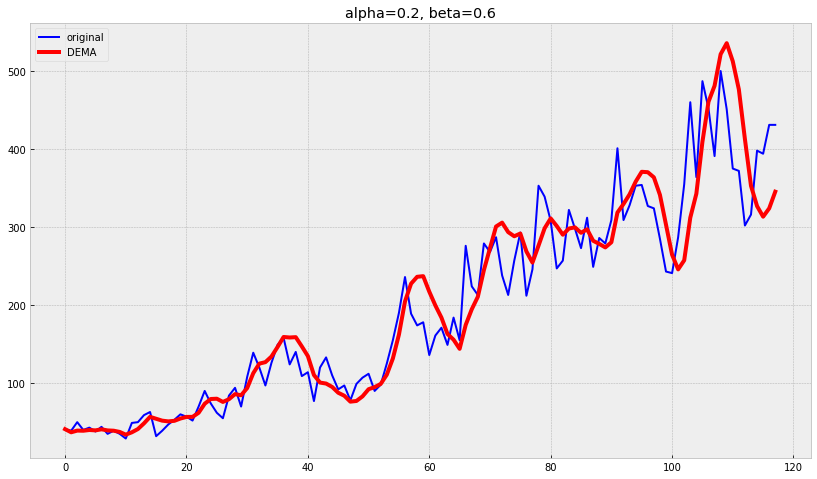

In [83]:
plot_dema(0.2, 0.6)

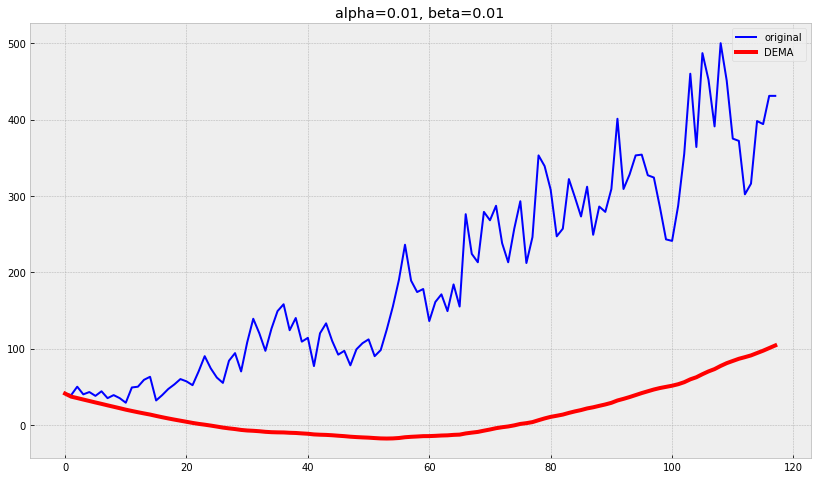

In [84]:
plot_dema(0.01, 0.01)

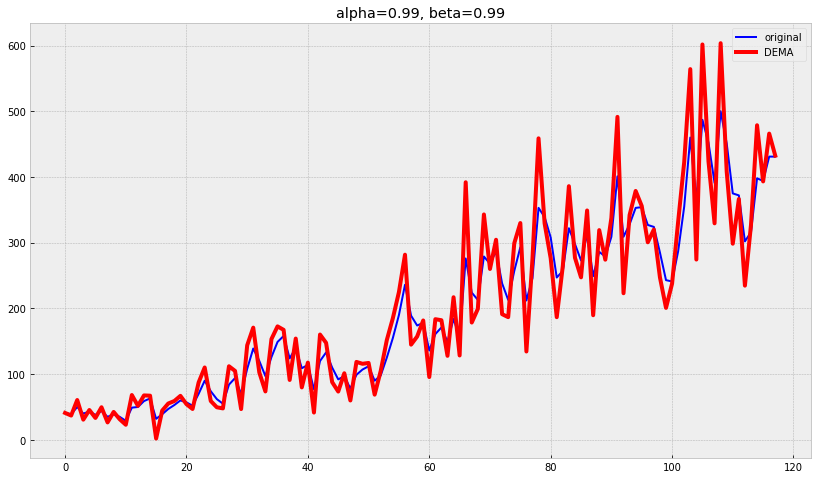

In [85]:
plot_dema(0.99, 0.99)

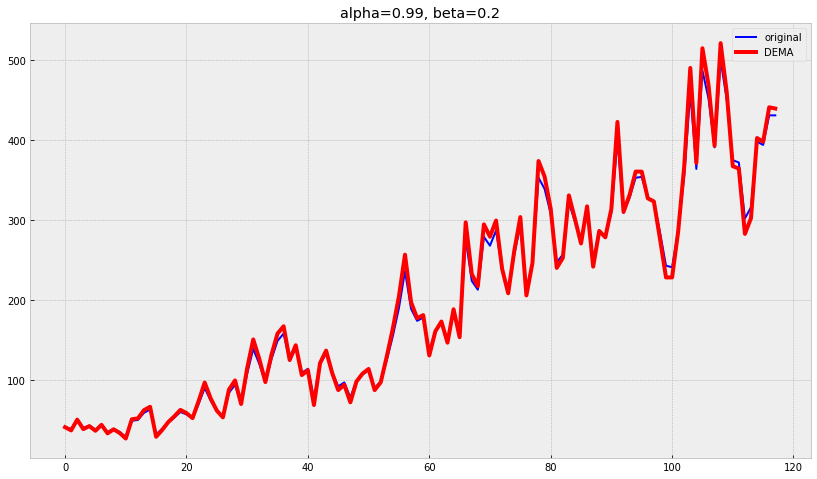

In [86]:
plot_dema(0.99, 0.2)

### функция, которая предсказывает 5 наблюдений ряда на основе double_ema. Возьмите ряд robberies_in_boston и спрогнозируем

In [89]:
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        preds.append(level+trend)

    return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)

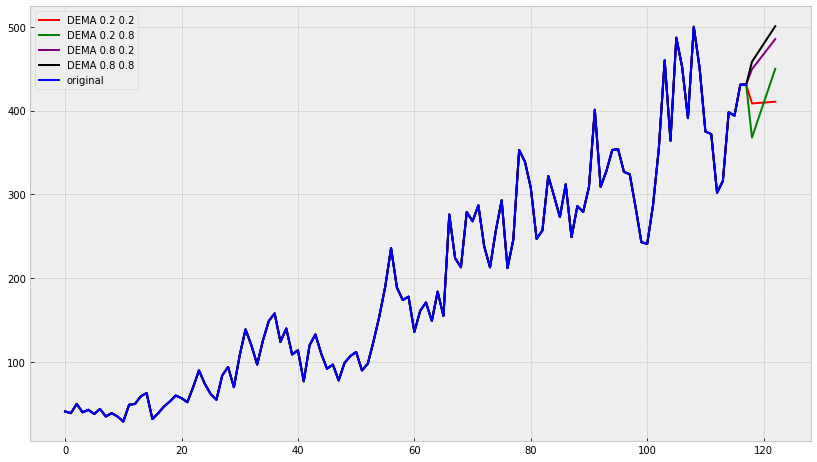

In [90]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(robberies_in_boston["Count"], alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(robberies_in_boston["Count"], color='blue',label='original')
    plt.legend()

### Хольт-Винтерс

In [91]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [92]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [93]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [94]:
def plot_tema(alpha, beta, gamma, ser=robberies_in_boston["Count"], ser_to_plot=robberies_in_boston["Count"], n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

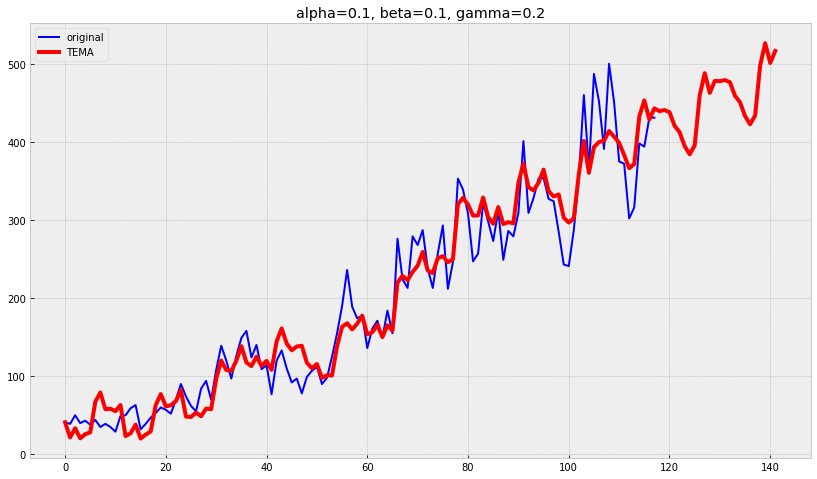

In [95]:
plot_tema(0.1, 0.1, 0.2)

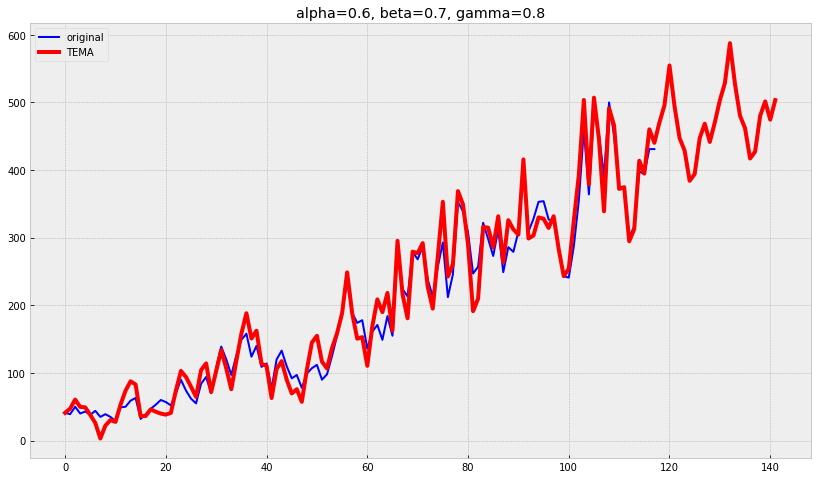

In [96]:
plot_tema(0.6, 0.7, 0.8)

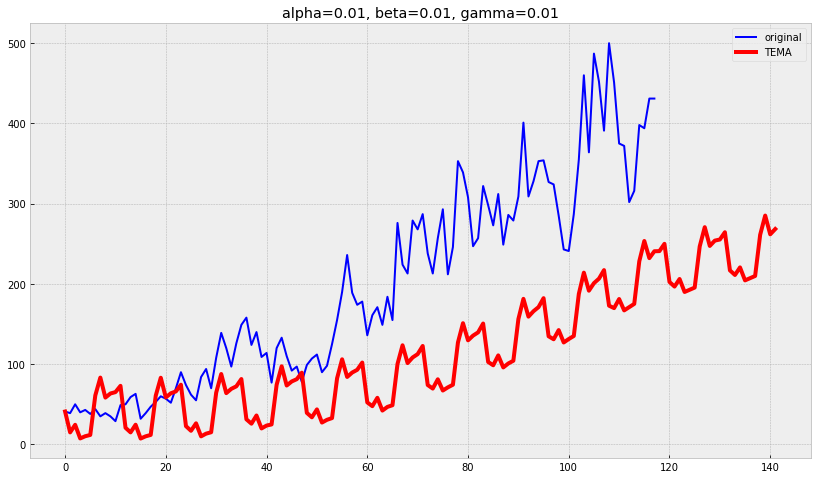

In [97]:
plot_tema(0.01, 0.01, 0.01)

### Подбор параметров

In [98]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [99]:
series = robberies_in_boston["Count"]

In [100]:
train, test, val = series[:60], series[60:70], series[70:]

In [101]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [102]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [103]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 1947.743645453523
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-419.16330247,    0.        ,    0.        ])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 28
      nit: 6
   status: 0
  success: True
        x: array([1.        , 0.07535594, 1.        ])


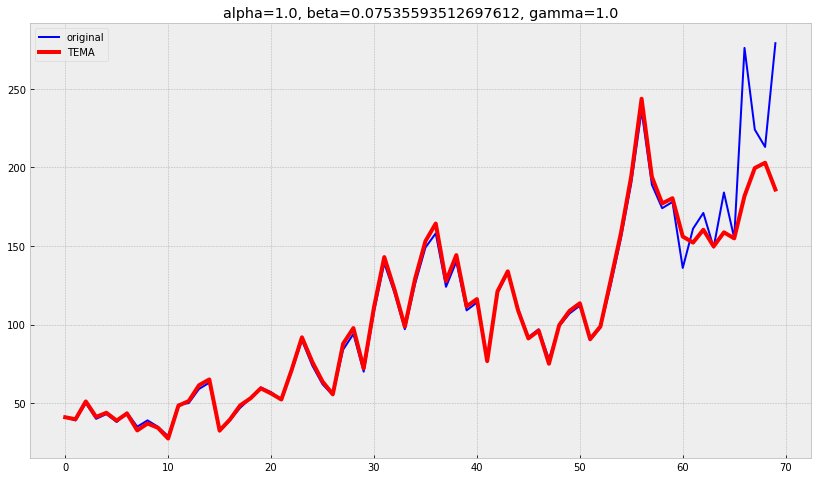

In [104]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series[:70], n_preds=len(test))

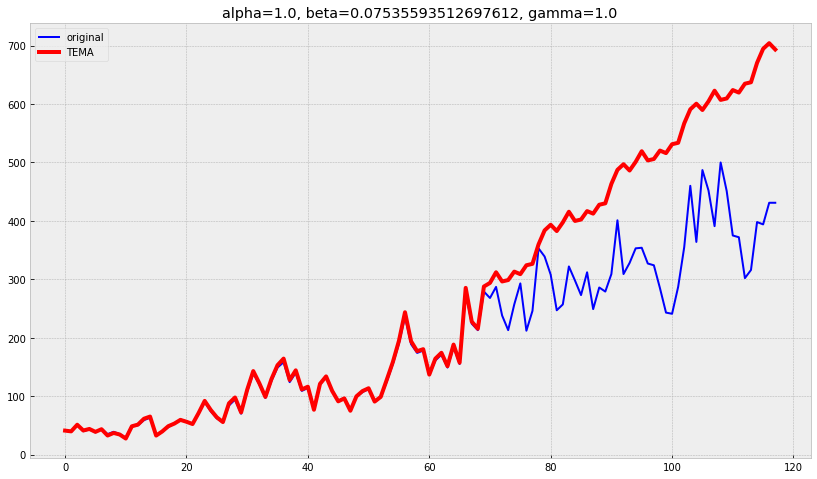

In [105]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=series[:70], ser_to_plot=series, n_preds=len(val))

### Кросс-валидация

In [108]:
train, val = series[:65], series[65:]

In [109]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train):
        train_split_ts = train.iloc[train_split]
        test_split_ts = train.iloc[test_split]

        result = triple_exponential_smoothing(train_split_ts, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split_ts):]
        error = mean_squared_error(predictions, test_split_ts)
        errors.append(error)

    return np.mean(np.array(errors))

In [110]:
opt = minimize(mse_cross_val, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [111]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 2562.189766965103
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.63230459e+03, -4.54747351e-05,  0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 7
   status: 0
  success: True
        x: array([1.        , 0.01016386, 1.        ])


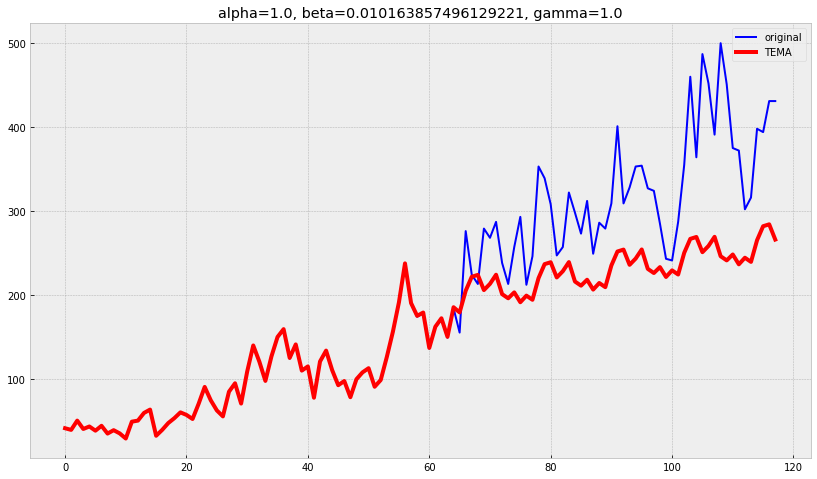

In [112]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series, n_preds=len(val))

### 2. daily-total-female-births-in-cal.csv (стационарный)

In [122]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [123]:
ser = moving_average(female_births["Count"], 7)

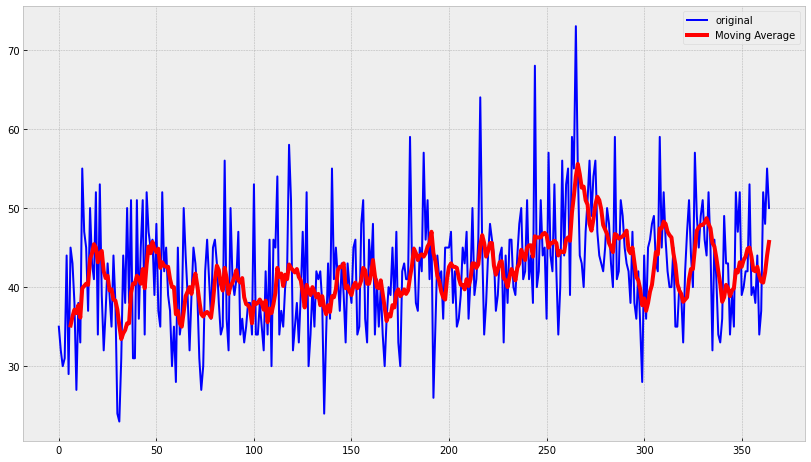

In [124]:
ser = moving_average(female_births["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(female_births["Count"], color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [125]:
series_pred = predict(female_births["Count"], 7, 50)

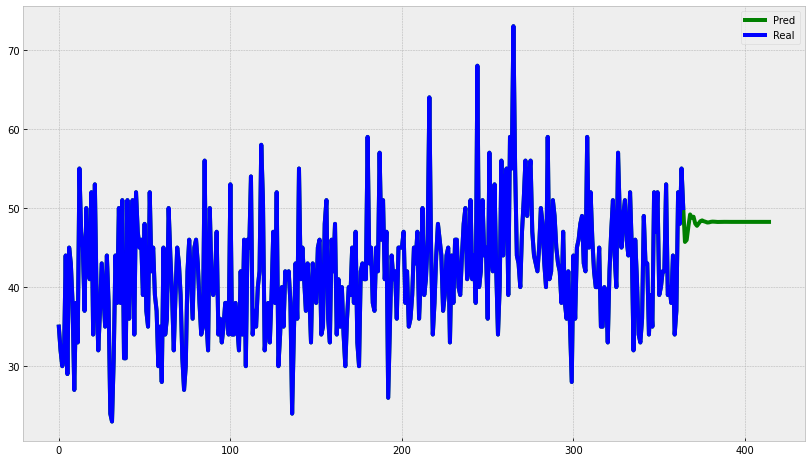

In [126]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred, color='green', linewidth='4', label='Pred')
    plt.plot(female_births["Count"], color='blue', linewidth='4', label='Real')
    plt.legend()

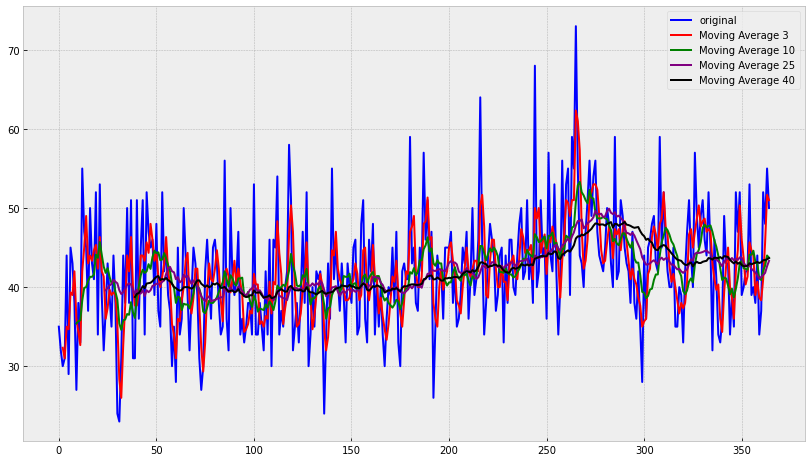

In [127]:
windows = [3,10,25,40]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(female_births["Count"], color='blue',label='original')
    for i in range(len(windows)):
        ser = moving_average(female_births["Count"], windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='Moving Average {}'.format(windows[i]))
    plt.legend()

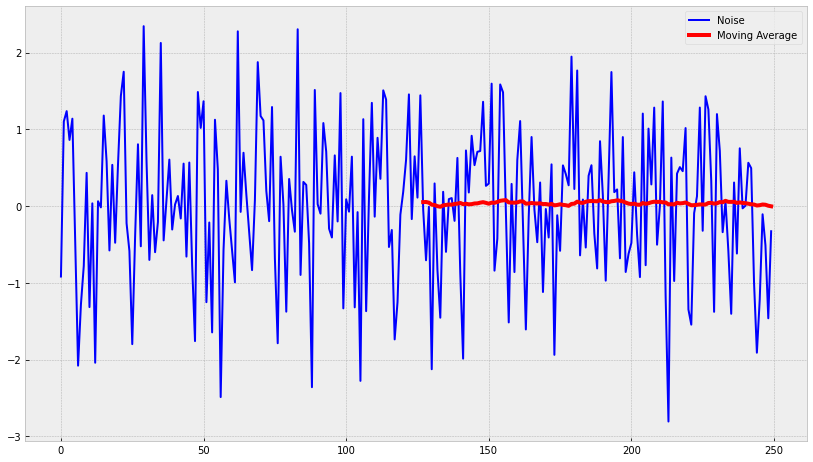

In [128]:
random_noise = pd.Series(np.random.randn(250))
ma_on_noise = moving_average(random_noise, 128)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(random_noise, color='blue',label='Noise')
    plt.plot(ma_on_noise, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Вывод:

Лучше всего показывает модель **wma**